In [106]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_csv('Recruitment_Transactions_ToBeDistributed.csv')

In [3]:
df.head()

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [4]:
df.drop(columns= 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496751 entries, 0 to 5496750
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   the_transaction_id      object 
 1   the_date_transaction    object 
 2   sku_idr_sku             int64  
 3   product_type            object 
 4   sports                  object 
 5   but_name_business_unit  object 
 6   ctm_customer_id         object 
 7   the_to_type             object 
 8   f_qty_item              int64  
 9   f_to_tax_in             float64
dtypes: float64(1), int64(2), object(7)
memory usage: 419.4+ MB


In [6]:
df.describe()

,sku_idr_sku,f_qty_item,f_to_tax_in
count,5.496751e+06,5.496751e+06,5.496751e+06
mean,5.803890e+06,2.979526e+00,6.196055e+01
std,2.466495e+06,1.518516e+00,5.752038e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500415e+06,2.000000e+00,2.400000e+01
50%,7.204275e+06,3.000000e+00,4.000000e+01
75%,7.328256e+06,4.000000e+00,8.550000e+01
max,7.542224e+06,5.010000e+02,4.318000e+03


Check if there are any null values

In [7]:
df.columns.isnull().sum()

0

## Average basket size and basket value of members and non members per store

Segregating member and non-member transactions

In [8]:
df_not_ctm = df.loc[df['ctm_customer_id'].isnull()]

In [9]:
df_not_ctm

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
...,...,...,...,...,...,...,...,...,...,...
5496736,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,3,92.0
5496737,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,6,92.0
5496738,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,8,92.0
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0


Identify products that does not have any ID which may affect our average calculations.

In [10]:
df_not_ctm.query('sku_idr_sku == 0')

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
...,...,...,...,...,...,...,...,...,...,...
642,7-969-969-20201029185231-101-1473,2020-10-29 18:52:31,0,NaN,NaN,Bedok SG,NaN,offline,0,0.0
643,7-969-969-20201101171700-204-1080,2020-11-01 17:17:00,0,NaN,NaN,Bedok SG,NaN,offline,0,0.0
644,7-969-969-20200930153944-210-5683,2020-09-30 15:39:44,0,NaN,NaN,Bedok SG,NaN,offline,0,0.0
647,7-969-969-20200812140500-101-7217,2020-08-12 14:05:00,0,NaN,NaN,Bedok SG,NaN,offline,0,0.0


Removing rows that does not have value and quantity which will affect the average scores

In [11]:
df_not_ctm.query("f_qty_item == 0 & f_to_tax_in == 0")

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
...,...,...,...,...,...,...,...,...,...,...
3721951,7-969-969-20201117161120-101-2116,2020-11-17 16:11:20,7226948,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,NaN,offline,0,0.0
3721971,7-969-969-20201206131158-102-58,2020-12-06 13:11:58,7238111,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,NaN,offline,0,0.0
3721973,7-969-969-20201220100655-102-721,2020-12-20 10:06:55,7238111,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,NaN,offline,0,0.0
3722001,7-969-969-20201214123649-102-433,2020-12-14 12:36:49,7238111,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,NaN,offline,0,0.0


In [12]:
df_not_ctm = df_not_ctm.loc[df_not_ctm['sku_idr_sku'] != 0]
df_not_ctm = df_not_ctm.loc[(df_not_ctm['f_qty_item'] != 0) & (df_not_ctm['f_to_tax_in'] != 0) ]

In [13]:
df_not_ctm

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0
659,7-1034-1034-20200701151855-215-8375,2020-07-01 15:18:55,7009513,SUNGLASSES,RUNNING,City Square SG,NaN,offline,2,41.5
...,...,...,...,...,...,...,...,...,...,...
5496736,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,3,92.0
5496737,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,6,92.0
5496738,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,8,92.0
5496741,7-969-969-20201224141216-209-4124,2020-12-24 14:12:16,7145826,SHOES,RUNNING,Bedok SG,NaN,offline,2,76.0


In [49]:
store_grouped = df_not_ctm.groupby('but_name_business_unit').agg(
    average_basket_size=('f_qty_item', 'mean'),
    average_basket_value=('f_to_tax_in', 'mean')
)

# Print the average basket size and average basket value per store
for store_name, store_data in store_grouped.iterrows():
    print(f"Store: {store_name}")
    print(f"Average Basket Size: {store_data['average_basket_size']:.2f}")
    print(f"Average Basket Value: ${store_data['average_basket_value']:.2f}")
    print()

Store: Bedok SG
Average Basket Size: 2.97
Average Basket Value: $61.37

Store: Centre Point
Average Basket Size: 2.97
Average Basket Value: $58.80

Store: Chinatown Point
Average Basket Size: 2.96
Average Basket Value: $59.98

Store: City Square SG
Average Basket Size: 2.96
Average Basket Value: $60.85

Store: Decathlon Holland Village
Average Basket Size: 2.96
Average Basket Value: $64.01

Store: Decathlon Velocity
Average Basket Size: 2.97
Average Basket Value: $59.85

Store: Joo Koon
Average Basket Size: 2.97
Average Basket Value: $59.17

Store: Singapore Lab
Average Basket Size: 2.98
Average Basket Value: $61.56

Store: SunPlaza
Average Basket Size: 2.95
Average Basket Value: $60.65

Store: Tampines Mall
Average Basket Size: 2.97
Average Basket Value: $58.46

Store: Tiong Bahru Plaza
Average Basket Size: 2.96
Average Basket Value: $57.70

Store: Waterway Point
Average Basket Size: 2.95
Average Basket Value: $62.47

Store: Website
Average Basket Size: 3.00
Average Basket Value: $66.

In [15]:
print(f'The average basket size for non-members are {average_basket_size:.2f}')
print(f'The average basket value for non-members are ${average_basket_value:.2f}')

The average basket size for non-members are 2.97
The average basket value for non-members are $60.51


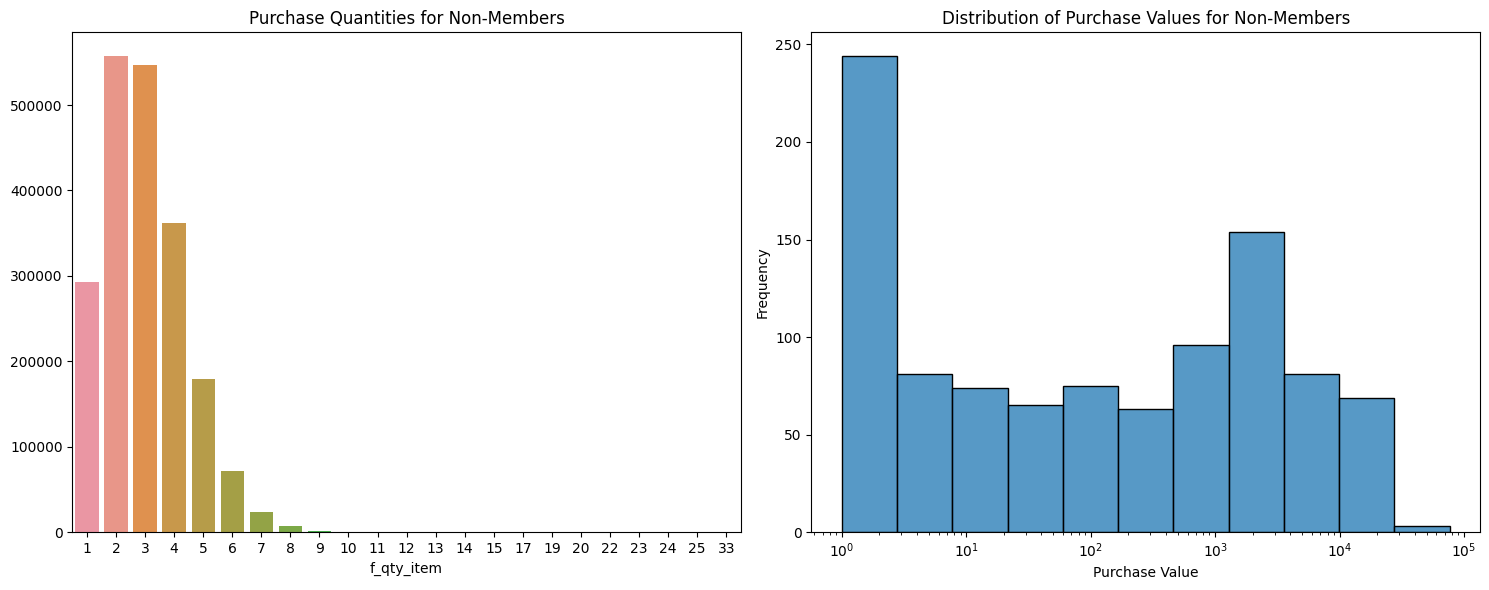

In [71]:
members_purchase = df_not_ctm['f_qty_item'].value_counts()
members_purchase_val = df_not_ctm['f_to_tax_in'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sb.barplot(x=members_purchase.index, y=members_purchase.values, ax=axes[0])
axes[0].set_title("Purchase Quantities for Non-Members")


sb.histplot(members_purchase_val, ax=axes[1],log_scale=(True, False))
axes[1].set_title("Distribution of Purchase Values for Non-Members")
axes[1].set_xlabel("Purchase Value")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
df_ctm = df.loc[~df['ctm_customer_id'].isnull()]

In [19]:
df_ctm = df_ctm.loc[df_ctm['sku_idr_sku']!= 0]
df_ctm = df_ctm.loc[(df_ctm['f_qty_item'] != 0) & (df_ctm['f_to_tax_in'] != 0) ]

In [20]:
average_basket_size_member = df_ctm['f_qty_item'].mean()
average_basket_value_member = df_ctm['f_to_tax_in'].mean()

In [51]:
store_grouped = df_ctm.groupby('but_name_business_unit').agg(
    average_basket_size=('f_qty_item', 'mean'),
    average_basket_value=('f_to_tax_in', 'mean')
)

# Print the average basket size and average basket value per store
for store_name, store_data in store_grouped.iterrows():
    print(f"Store: {store_name}")
    print(f"Average Basket Size: {store_data['average_basket_size']:.2f}")
    print(f"Average Basket Value: ${store_data['average_basket_value']:.2f}")
    print()

Store: Bedok SG
Average Basket Size: 2.98
Average Basket Value: $61.71

Store: Centre Point
Average Basket Size: 2.98
Average Basket Value: $59.47

Store: Chinatown Point
Average Basket Size: 2.97
Average Basket Value: $57.73

Store: City Square SG
Average Basket Size: 2.98
Average Basket Value: $60.72

Store: Decathlon Holland Village
Average Basket Size: 2.98
Average Basket Value: $63.01

Store: Decathlon Velocity
Average Basket Size: 2.98
Average Basket Value: $59.74

Store: Joo Koon
Average Basket Size: 2.98
Average Basket Value: $59.54

Store: Singapore Lab
Average Basket Size: 2.99
Average Basket Value: $61.21

Store: SunPlaza
Average Basket Size: 2.96
Average Basket Value: $60.58

Store: Tampines Mall
Average Basket Size: 2.97
Average Basket Value: $58.83

Store: Tiong Bahru Plaza
Average Basket Size: 2.98
Average Basket Value: $57.22

Store: Waterway Point
Average Basket Size: 2.96
Average Basket Value: $60.58

Store: Website
Average Basket Size: 3.19
Average Basket Value: $74.

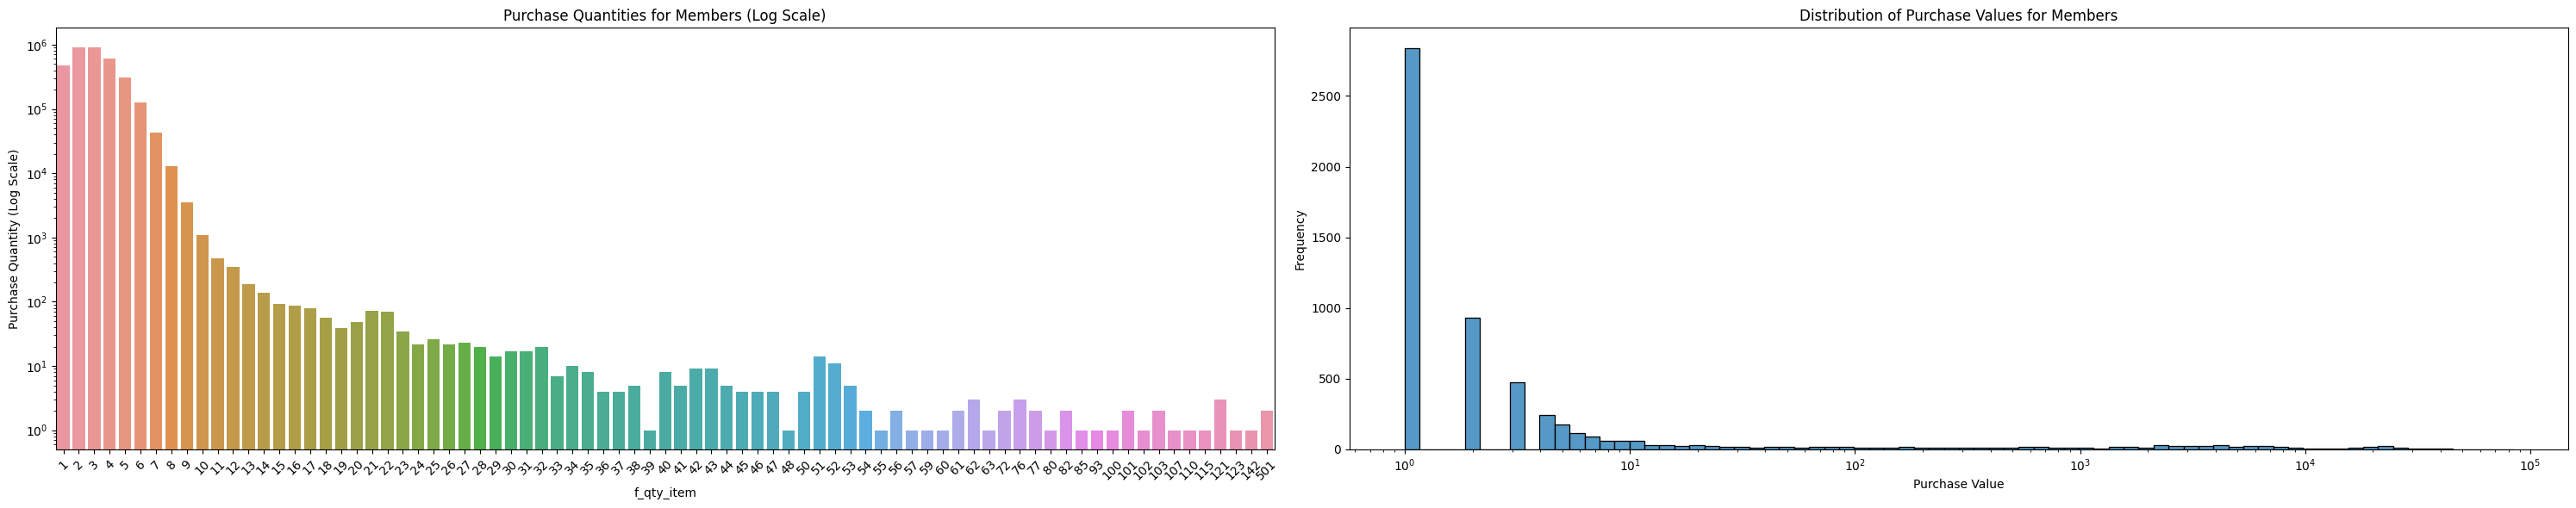

In [48]:
members_purchase = df_ctm['f_qty_item'].value_counts()
members_purchase_val = df_ctm['f_to_tax_in'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

sb.barplot(x=members_purchase.index, y=members_purchase.values, ax=axes[0])
axes[0].set_yscale("log")  # Apply logarithmic y-scale
axes[0].set_title("Purchase Quantities for Members (Log Scale)")
axes[0].set_ylabel("Purchase Quantity (Log Scale)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


sb.histplot(members_purchase_val, ax=axes[1],log_scale=(True, False))
axes[1].set_title("Distribution of Purchase Values for Members")
axes[1].set_xlabel("Purchase Value")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

## Three Channels Problem

In [52]:
df['but_name_business_unit'].unique()

array(['City Square SG', 'Joo Koon', 'Website', 'Decathlon Velocity',
       'Decathlon Holland Village', 'Singapore Lab', 'Centre Point',
       'SunPlaza', 'Waterway Point', 'Tampines Mall', 'Chinatown Point',
       'Tiong Bahru Plaza', 'Bedok SG'], dtype=object)

In [53]:
store_dict = {}
store_dict['City Square SG'] = 'Experience Stores'
store_dict['Joo Koon'] = 'Experience Stores'
store_dict['Website'] = 'Online'
store_dict['Decathlon Velocity'] = 'C&C Stores'
store_dict['Decathlon Holland Village'] = 'C&C Stores'
store_dict['Singapore Lab'] = 'Experience Stores'
store_dict['Centre Point'] = 'Experience Stores'
store_dict['SunPlaza'] = 'C&C Stores'
store_dict['Waterway Point'] = 'C&C Stores'
store_dict['Tampines Mall'] = 'C&C Stores'
store_dict['Chinatown Point'] = 'C&C Stores'
store_dict['Tiong Bahru Plaza'] = 'C&C Stores'
store_dict['Bedok SG'] = 'Experience Stores'


In [61]:
df_ctm.sort_values('ctm_customer_id')

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
1566909,7-2128-2128-20200729183354-207-90,2020-07-29 18:33:54,1719786,SADDLE BAG,CYCLING,Singapore Lab,000DFTLRKY,offline,2,12.5
5369129,7-2128-2128-20200717183538-206-2876,2020-07-17 18:35:38,7234253,HELMET,CYCLING,Singapore Lab,000DFTLRKY,offline,4,163.5
4723281,7-2128-2128-20200717183538-206-2876,2020-07-17 18:35:38,379525,BELL,CYCLING,Singapore Lab,000DFTLRKY,offline,2,6.0
2688874,7-2128-2128-20200729183354-207-90,2020-07-29 18:33:54,2355580,FLOOR PUMP,CYCLING,Singapore Lab,000DFTLRKY,offline,3,55.0
5366542,7-2128-2128-20200729183354-207-90,2020-07-29 18:33:54,1779638,PADDED CYCLING,CYCLING,Singapore Lab,000DFTLRKY,offline,2,123.0
...,...,...,...,...,...,...,...,...,...,...
5439683,7-1034-1034-20200919181651-214-8784,2020-09-19 18:16:51,7005146,SCALE,RUNNING,City Square SG,ZZZUB8CDE9,offline,2,82.5
5439682,7-1034-1034-20200919181651-214-8784,2020-09-19 18:16:51,2035618,SHOES,RUNNING,City Square SG,ZZZUB8CDE9,offline,2,29.0
1316808,7-1871-1871-20200920174926-207-2315,2020-09-20 17:49:26,7263424,SHOES,RUNNING,Joo Koon,ZZZZBP6S27,offline,5,54.0
4050744,7-1871-1871-20200920174926-207-2315,2020-09-20 17:49:26,2331274,SANDALS,SWIMMING,Joo Koon,ZZZZBP6S27,offline,1,36.5


In [63]:
df_ctm = df_ctm.merge(pd.DataFrame(store_dict.items(), columns=['but_name_business_unit', 'StoreType']), on='but_name_business_unit', how='left')

In [68]:
result = df_ctm.groupby('ctm_customer_id')['StoreType'].agg(set).reset_index()

In [69]:
print(result)

       ctm_customer_id                                StoreType
0           000DFTLRKY                      {Experience Stores}
1           000FX6RHTM                      {Experience Stores}
2           000NZ1KH93          {Experience Stores, C&C Stores}
3           000R842PBV                                 {Online}
4           0014SWGO7X                      {Experience Stores}
...                ...                                      ...
384725      ZZZMIYQG58                      {Experience Stores}
384726      ZZZPD2IMD6                                 {Online}
384727      ZZZS1QUNOD                      {Experience Stores}
384728      ZZZUB8CDE9  {C&C Stores, Experience Stores, Online}
384729      ZZZZBP6S27                      {Experience Stores}

[384730 rows x 2 columns]


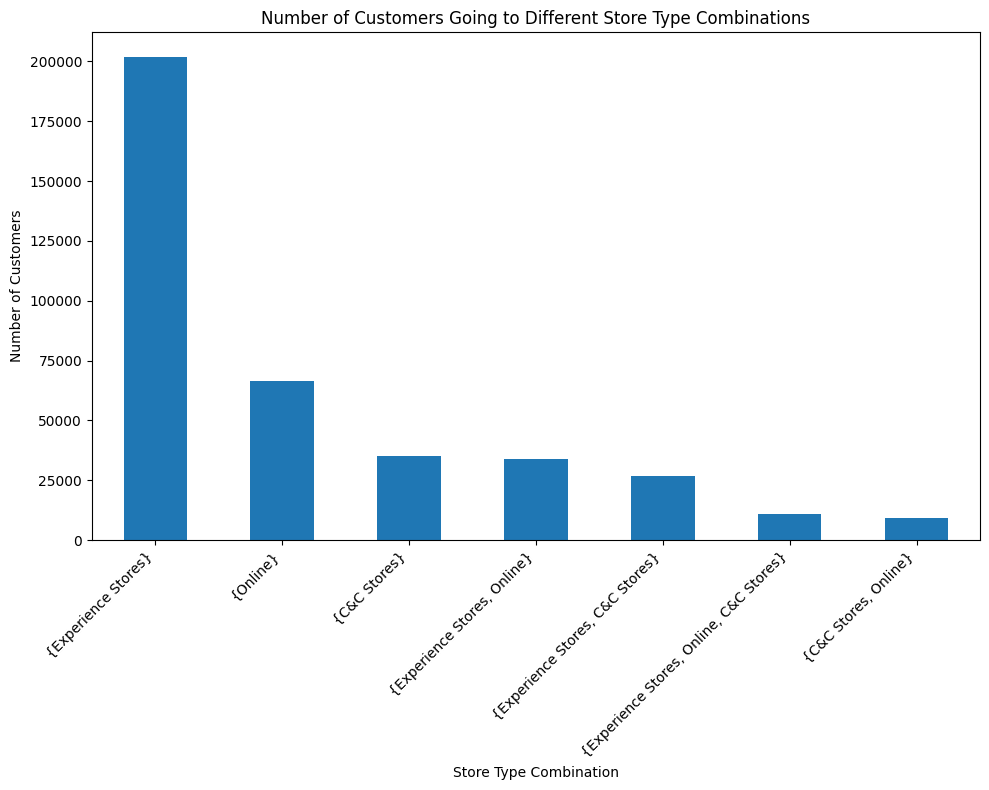

In [73]:
customer_storetype = result['StoreType'].value_counts()
plt.figure(figsize = (10,8))
customer_storetype.plot(kind = 'bar')

plt.xlabel('Store Type Combination')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Going to Different Store Type Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

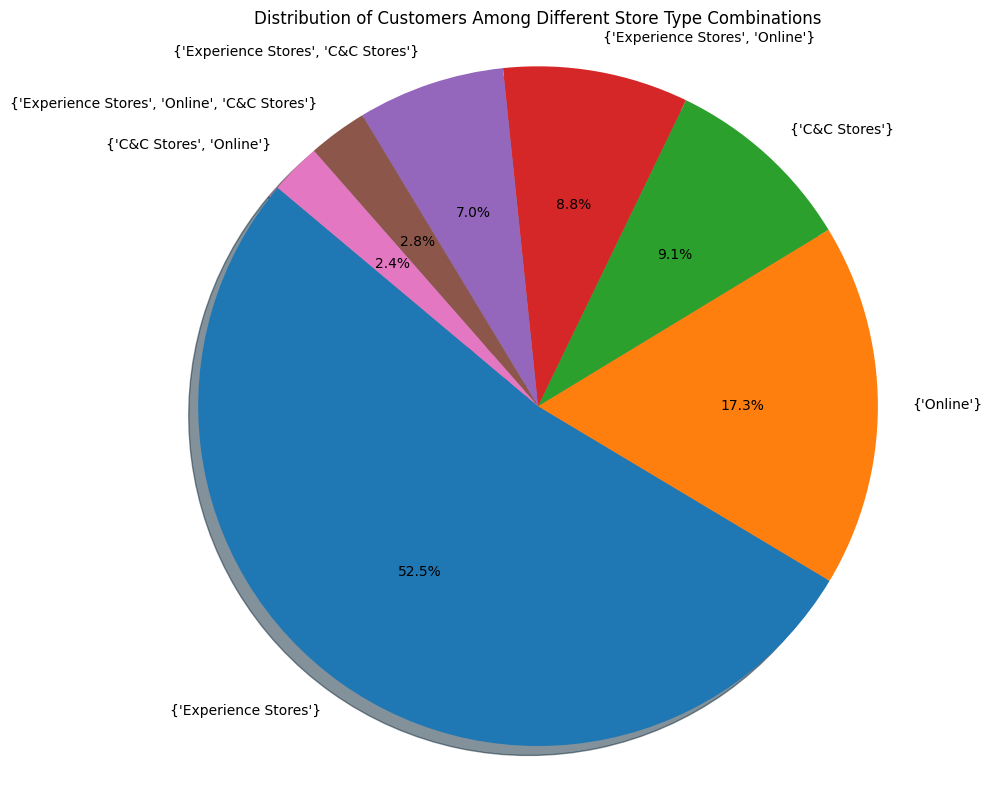

In [79]:
plt.figure(figsize = (10,8))
plt.pie(customer_storetype, labels = customer_storetype.index, autopct = '%1.1f%%', startangle = 140, shadow = True)
plt.title('Distribution of Customers Among Different Store Type Combinations')
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [83]:
customer_storetype


StoreType
{Experience Stores}                        202072
{Online}                                    66455
{C&C Stores}                                35182
{Experience Stores, Online}                 33919
{Experience Stores, C&C Stores}             26941
{Experience Stores, Online, C&C Stores}     10826
{C&C Stores, Online}                         9335
Name: count, dtype: int64

In [89]:
total_customers = len(result)
customer_percentages = (customer_storetype/total_customers)*100
print("Percentage of customers for each store type:")
print(customer_percentages)

Percentage of customers for each store type:
StoreType
{Experience Stores}                        52.523068
{Online}                                   17.273153
{C&C Stores}                                9.144595
{Experience Stores, Online}                 8.816313
{Experience Stores, C&C Stores}             7.002573
{Experience Stores, Online, C&C Stores}     2.813921
{C&C Stores, Online}                        2.426377
Name: count, dtype: float64


## Popular Timings for purchases in stores

The df needs to be cleaned by: <li>removing but_name_business_unit 'online' <li> sku_idr_sku == 0 which mean no product id <li> removing f_qty_item == 0 and f_to_tax_in == 0 which meant that no transaction of any value and product occured.

In [91]:
df = df.loc[df['but_name_business_unit'] != 'online']
df = df.loc[df['sku_idr_sku'] != 0]
df = df.loc[(df['f_qty_item'] != 0) & (df['f_to_tax_in'] != 0)]

To convert object to date_time object

In [111]:
df['the_date_transaction'] = pd.to_datetime(df['the_date_transaction'])

Utilise the hours to identify which is the most popular time where people purchase products

In [112]:
df['hour'] = df['the_date_transaction'].dt.hour

In [113]:
transaction_counts = df.groupby(['hour']).size().reset_index(name='count')

In [114]:
transaction_counts

,hour,count
0,0,1896
1,1,39
2,2,58
3,3,5
4,4,15
5,6,6
6,7,280
7,8,22189
8,9,54159
9,10,169634


#### Calculated for all store_types

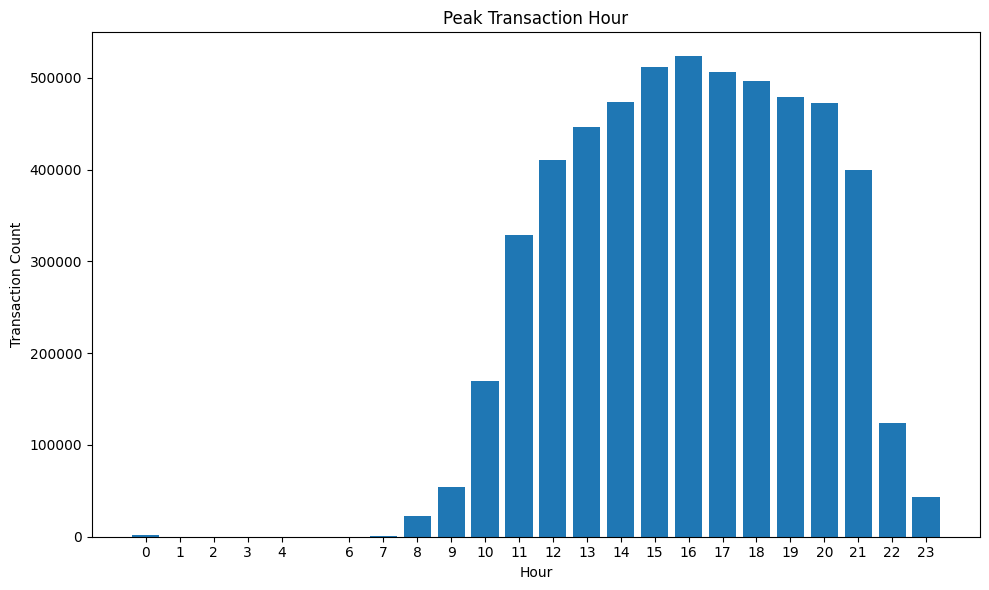

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(transaction_counts['hour'], transaction_counts['count'])
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Peak Transaction Hour')
plt.xticks(transaction_counts['hour'])
plt.tight_layout()

In [118]:
peak_time = transaction_counts.loc[transaction_counts['count'].idxmax()]

print("Peak Time:", peak_time['hour'], "hours", "with", peak_time['count'], "transactions")

Peak Time: 16 hours with 523259 transactions


In [120]:
df['store_type'] = df['but_name_business_unit'].map(store_dict)

### Identify the different popular timings for different store types

In [128]:
df_exp_stores = df[df['store_type'] == "Experience Stores"]
df_cc_stores = df[df['store_type'] == "C&C Stores"]
df_online= df[df['store_type'] == "Online"]

In [136]:
df_exp_stores.head()

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,hour,minute,store_type
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,14,0,Experience Stores
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,10,48,Experience Stores
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,22,34,Experience Stores
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,13,31,Experience Stores
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,18,30,Experience Stores


In [149]:
transaction_counts = df_exp_stores.groupby(['hour']).size().reset_index(name='count')
peak_time_exp = transaction_counts.loc[transaction_counts['count'].idxmax()]

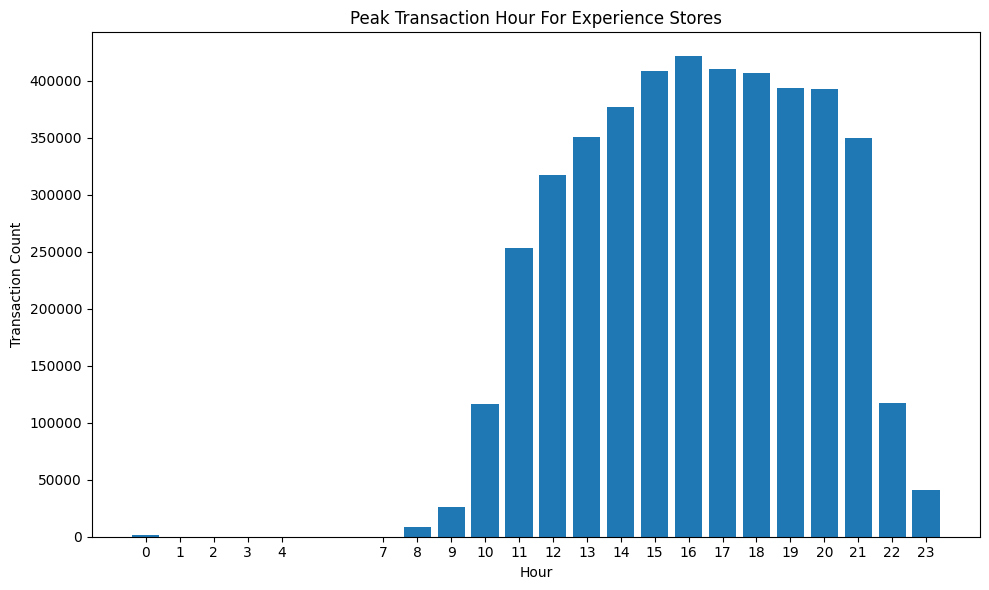

In [150]:
plt.figure(figsize=(10, 6))
plt.bar(transaction_counts['hour'], transaction_counts['count'])
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Peak Transaction Hour For Experience Stores')
plt.xticks(transaction_counts['hour'])
plt.tight_layout()

In [151]:
df_cc_stores.head()

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,hour,minute,store_type
3970,7-1979-1979-20200712151047-203-5397,2020-07-12 15:10:47,7207287,SUNGLASSES,RUNNING,Decathlon Holland Village,AO886MVE0M,offline,4,43.5,15,10,C&C Stores
3996,7-1979-1979-20200703200123-203-3559,2020-07-03 20:01:23,7201659,SHORTS,RUNNING,Decathlon Holland Village,NaN,offline,3,27.0,20,1,C&C Stores
4021,7-1979-1979-20200807192016-203-963,2020-08-07 19:20:16,6912034,WATER POUCH,RUNNING,Decathlon Holland Village,VV6BW9TGKK,offline,3,20.0,19,20,C&C Stores
4022,7-1979-1979-20200810121030-203-1547,2020-08-10 12:10:30,7201659,SHORTS,RUNNING,Decathlon Holland Village,J1UQ9VHX6C,offline,5,27.0,12,10,C&C Stores
4024,7-1979-1979-20201108121410-203-8336,2020-11-08 12:14:10,7202910,RUNNING MID TIG,RUNNING,Decathlon Holland Village,NaN,offline,3,51.0,12,14,C&C Stores


In [152]:
transaction_counts = df_cc_stores.groupby(['hour']).size().reset_index(name='count')

peak_time_cc = transaction_counts.loc[transaction_counts['count'].idxmax()]

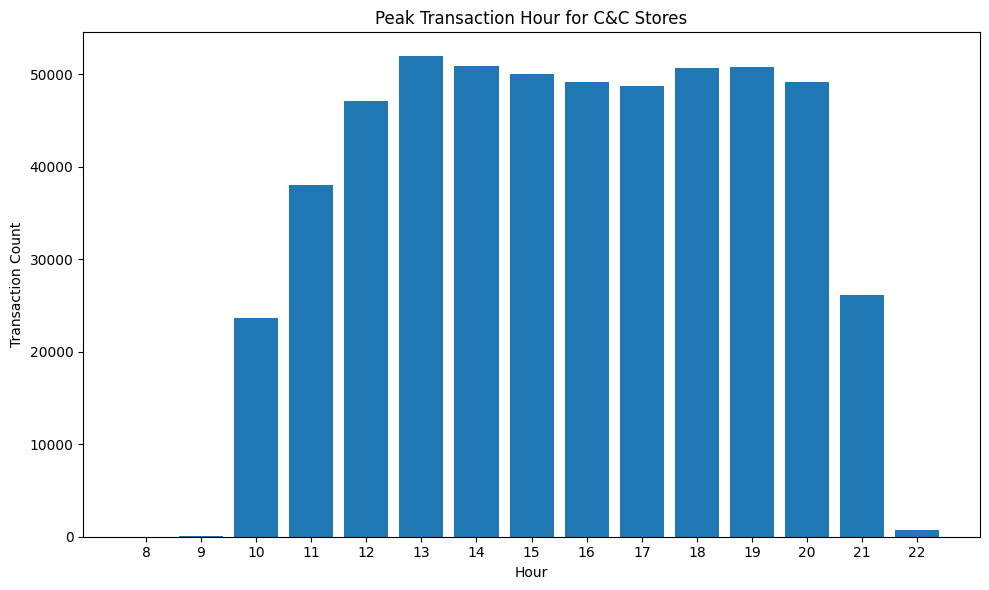

In [153]:
plt.figure(figsize=(10, 6))
plt.bar(transaction_counts['hour'], transaction_counts['count'])
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Peak Transaction Hour for C&C Stores')
plt.xticks(transaction_counts['hour'])
plt.tight_layout()

In [154]:
df_online.head()

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,hour,minute,store_type
475,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5,21,46,Online
670,7-1034-1034-20200710102742-117-88,2020-07-10 10:27:42,7206544,WATER BOTTLE BE,RUNNING,Website,ZY8KCYC8O3,online,5,83.5,10,27,Online
786,7-1034-1034-20200704160615-117-27,2020-07-04 16:06:15,7204924,RUNNING MID TIG,RUNNING,Website,0VX6TTV6ES,online,2,98.5,16,6,Online
788,7-1034-1034-20200703124109-102-6434,2020-07-03 12:41:09,7231216,WATER BOTTLE BE,RUNNING,Website,OUSGNK1LLA,online,5,48.5,12,41,Online
826,7-1034-1034-20200803174610-118-52,2020-08-03 17:46:10,7209766,SHORTS,RUNNING,Website,POSTV6OQ9L,online,2,36.5,17,46,Online


In [155]:
transaction_counts = df_online.groupby(['hour']).size().reset_index(name='count')
peak_time_online = transaction_counts.loc[transaction_counts['count'].idxmax()]

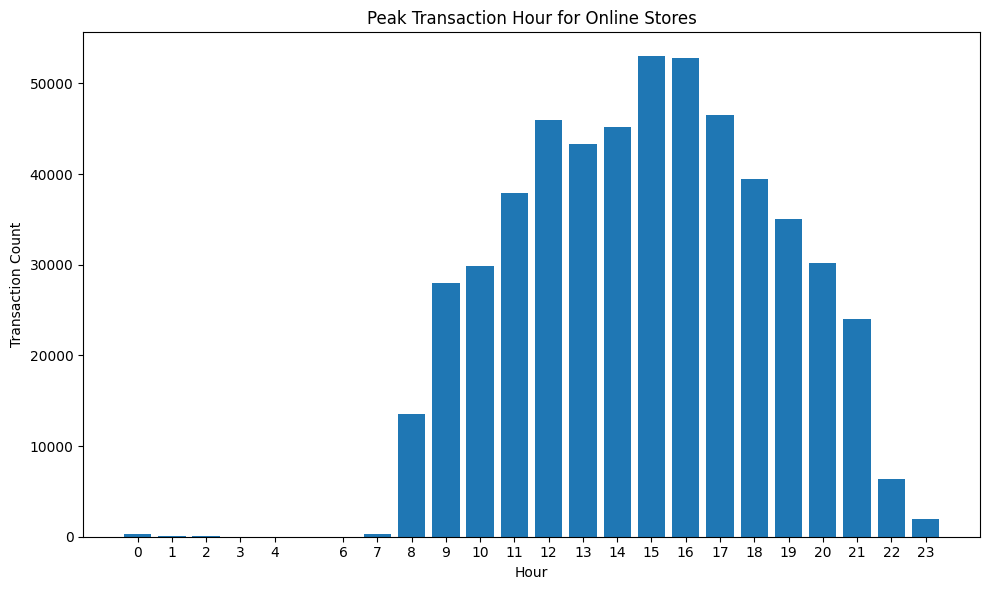

In [156]:
plt.figure(figsize=(10, 6))
plt.bar(transaction_counts['hour'], transaction_counts['count'])
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Peak Transaction Hour for Online Stores')
plt.xticks(transaction_counts['hour'])
plt.tight_layout()

In [161]:

print(f"It is observed that the peak hour for Experience Stores are {peak_time_exp['hour']} hour with {peak_time_exp['count']} transactions \nC&C Stores are {peak_time_cc['hour']} hour with {peak_time_cc['count']} transactions \nOnline stores are {peak_time_online['hour']} hour with {peak_time_online['count']} transactions ")

It is observed that the peak hour for Experience Stores are 16 hour with 421308 transactions 
C&C Stores are 13 hour with 51938 transactions 
Online stores are 15 hour with 52974 transactions 
